x1 = -4.000000
x2 = -1.000003
x3 = 1.500000


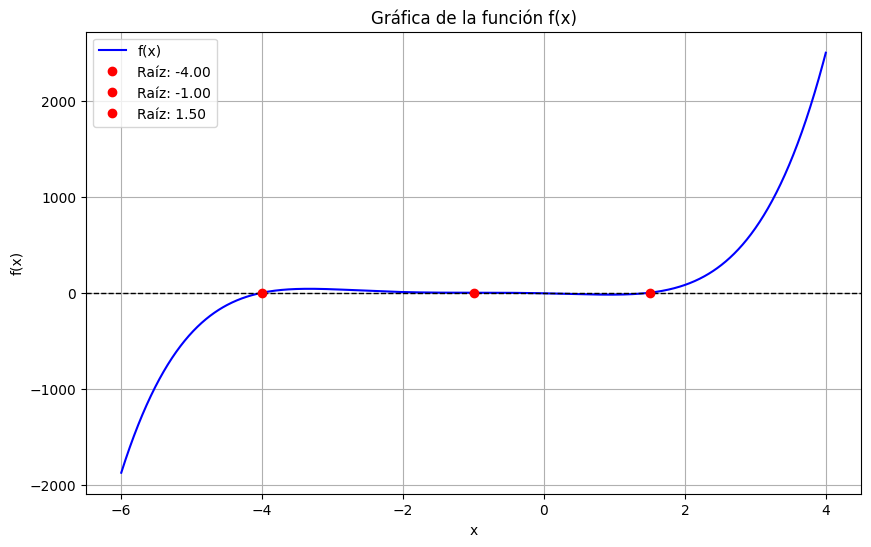

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton

def f(x):
    return x**5 + 5.5*x**4 + 4.5*x**3 - 9.5*x**2 - 15.5*x - 6

def df(x):
    return 5*x**4 + 22*x**3 + 13.5*x**2 - 19*x - 15.5

raices = []

x_vals = np.arange(-10, 10, 0.05)

for i in range(len(x_vals) - 1):
    a, b = x_vals[i], x_vals[i+1]
    try:
        if f(a) * f(b) < 0:
            r = bisect(f, a, b)
            if not any(np.isclose(r, x, atol=1e-5) for x in raices):
                raices.append(r)
    except Exception:
        continue

semillas = np.arange(-10, 10, 0.25)
for s in semillas:
    try:
        r = newton(f, s, fprime=df)
        if np.isreal(r) and not any(np.isclose(r, x, atol=1e-5) for x in raices):
            raices.append(r.real)
    except Exception:
        continue

raices = sorted(raices)
raices = raices[:6]

for i, r in enumerate(raices):
    print(f"x{i+1} = {r:.6f}")

x = np.linspace(-6, 4, 1000)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x)", color="blue")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)

for r in raices:
    if not np.isnan(r):
        plt.plot(r, f(r), 'ro', label=f"Raíz: {r:.2f}")

plt.title("Gráfica de la función f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

